In [1]:
import bisect
import matplotlib.pyplot as plt

class TaxCalculator:
    
    def __init__(self, year=2025):
        self.social_rate = 0.062
        self.medicare_rate = 0.0145
        self.additional_medicare_rate = 0.009
        self.medicare_cap = 250000
        self.year = year
        if year == 2025:
            self.brackets = [0, 23850, 96950, 206700, 394600, 501050, 751600]
            self.rates = [0.1, 0.12, 0.22, 0.24, 0.32, 0.35, 0.37]
            self.social_cap = 176100
            self.deduct = 30000
        elif year == 2024:
            self.brackets = [0, 23200, 94300, 201050, 383900, 487450, 731201]
            self.rates = [0.1, 0.12, 0.22, 0.24, 0.32, 0.35, 0.37]
            self.social_cap = 168600
            self.deduct = 29200
        else:
            raise Exception("NOT SUPPORTED")
        self.add_tax = self._compute_add_tax()

    
    def _compute_add_tax(self):
        delta = [self.brackets[i] - self.brackets[i-1] for i in range(1, len(self.brackets))]
        res = [0]
        cur = 0
        for (d, r) in zip(delta, self.rates):
            cur += d * r
            res.append(cur)
        return res

    
    def compute_fed_tax(self, income):
        taxable = income - self.deduct
        if taxable <= 0:
            return (0, 0)
        idx = bisect.bisect_left(self.brackets, taxable)
        tax = self.add_tax[idx-1] + (taxable - self.brackets[idx-1]) * self.rates[idx-1]
        return (tax, tax/income)

    
    def plot_fed_tax(self, max_income=1000000):
        data = [x for x in range(max_income)]
        y_tax = [self.compute_fed_tax(x)[0] for x in data]
        y_rate = [self.compute_fed_tax(x)[1]*100 for x in data]

        fig, ax1 = plt.subplots()

        color = 'tab:orange'
        ax1.set_xlabel('Income')
        ax1.set_ylabel('Effective Tax Rate (%)', color=color)
        ax1.plot(data, y_rate, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Federal Tax', color=color)  # we already handled the x-label with ax1
        ax2.plot(data, y_tax, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        plt.ticklabel_format(style='plain', axis='x', useMathText=True)

        for x in self.brackets[1:]:
            y_tax, y_rate = self.compute_fed_tax(x) 
            ax1.scatter(x, y_rate*100)
            ax2.scatter(x, y_tax)

        plt.title(f'Income Tax - Federal {self.year}')
        plt.grid(axis='both')
        plt.show()

    
    def compute_fica_tax(self, income):
        taxable = income - self.deduct
        if taxable <= 0:
            return (0, 0)
        social_tax = min(taxable, self.social_cap) * self.social_rate
        medicare_tax = taxable * self.medicare_rate + max(0, taxable - self.medicare_cap) * (self.medicare_rate + self.additional_medicare_rate)
        tax = social_tax + medicare_tax
        return (tax, tax / income)

    
    def plot_fica_tax(self, max_income=1000000):
        data = [x for x in range(max_income)]
        y_tax = [self.compute_fica_tax(x)[0] for x in data]
        y_rate = [self.compute_fica_tax(x)[1]*100 for x in data]

        fig, ax1 = plt.subplots()

        color = 'tab:orange'
        ax1.set_xlabel('Income')
        ax1.set_ylabel('Effective Tax Rate (%)', color=color)
        ax1.plot(data, y_rate, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

        color = 'tab:green'
        ax2.set_ylabel('FICA Tax', color=color)  # we already handled the x-label with ax1
        ax2.plot(data, y_tax, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        plt.ticklabel_format(style='plain', axis='x', useMathText=True)
        plt.grid(axis='both')

        plt.title(f'Income Tax - FICA {self.year}')
        plt.show()

    def compute_income_tax(self, income):
        fed = self.compute_fed_tax(income)
        fica = self.compute_fica_tax(income)
        return (fed[0]+fica[0], fed[1]+fica[1])

    def plot_income_tax(self, max_income=1000000):
        data = [x for x in range(max_income)]
        y_tax = [self.compute_income_tax(x)[0] for x in data]
        y_rate = [self.compute_income_tax(x)[1]*100 for x in data]

        fig, ax1 = plt.subplots()

        color = 'tab:orange'
        ax1.set_xlabel('Income')
        ax1.set_ylabel('Effective Tax Rate (%)', color=color)
        ax1.plot(data, y_rate, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

        color = 'tab:purple'
        ax2.set_ylabel('Income Tax', color=color)  # we already handled the x-label with ax1
        ax2.plot(data, y_tax, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        plt.ticklabel_format(style='plain', axis='x', useMathText=True)
        plt.grid(axis='both')

        plt.title(f'Income Tax {self.year}')
        plt.show()

In [2]:
income = 251431.45
cal_2024 = TaxCalculator(2024)

In [3]:
cal_2024.compute_fed_tax(income)

(39420.548, 0.15678447545046573)

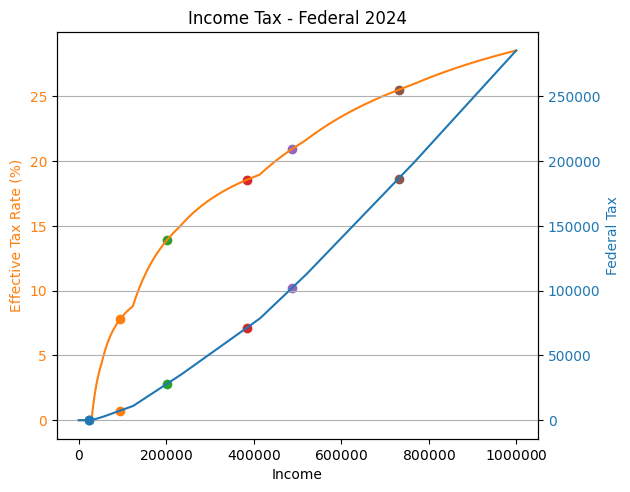

In [4]:
cal_2024.plot_fed_tax()

In [5]:
cal_2024.compute_fica_tax(income)

(13675.556025000002, 0.05439079329574722)

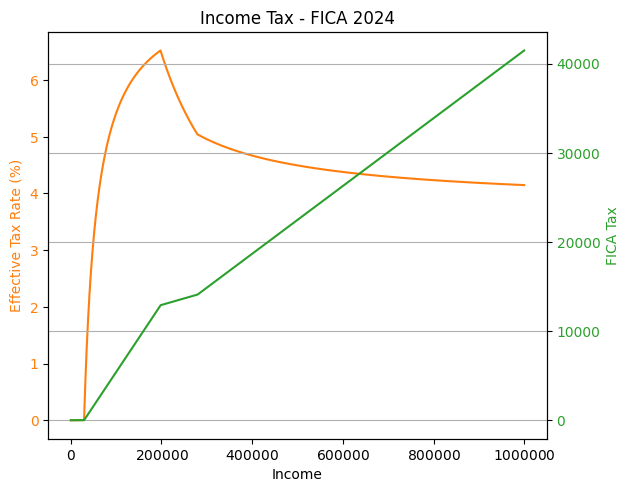

In [6]:
cal_2024.plot_fica_tax()

In [7]:
cal_2024.compute_income_tax(income)

(53096.10402500001, 0.21117526874621295)

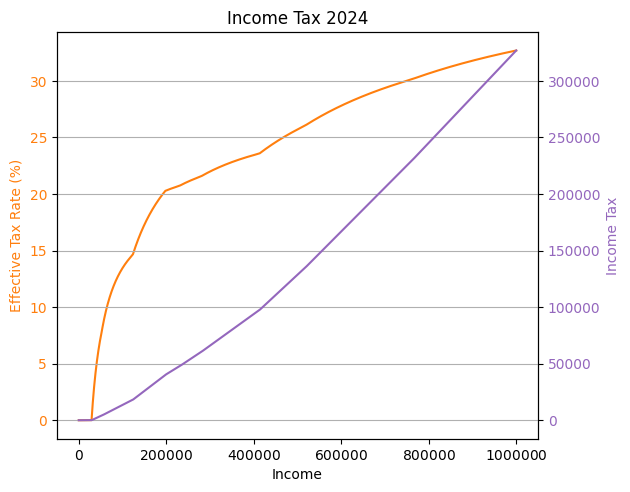

In [8]:
cal_2024.plot_income_tax()